<a href="https://colab.research.google.com/github/pelinbalci/TF_Intro/blob/main/lecture_3_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np



```
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(),
tf.keras.layers.Dense()
])
```

lets write the parameters:

```
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1),
```

with model summary you can see the changes:

64 is the number of filters for this layer. 

3*3 is the size of the filter.

input_shape is the shape of the input we fed in which is 28*28 with 1 byte color depth


```
tf.keras.layers.MaxPooling2D(2,2)
```

2*2 defines the chunks to pool. 





In [3]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

(None, 26, 26, 64), since we don't use padding here. 

Each filter will learn 9 values for the filter coefficients + bias --> 64 filters have 640 learnable parameters.


pooling reduce the dimensionality by half. but there is not any learnable params here. 


3*3 filter then reduces 13*13 to 11*11 by removing a pixel border like before. 

max pool half of it --> 5*5

so we flatten: 64*5*5 = 1600

dense network = 1600* 128 = 204800


final layer: 128*10 + 10 bias = 1290 params


In [6]:
import tensorflow as tf
import numpy as np

In [28]:
# Pre Model

#load data
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

# create model 
#note: without giving input shape model summary gives error
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')                             
]
)

model.summary()


#define optimizer and train the model and get test loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(x_train, y_train, epochs=5)
test_loss = model.evaluate(x_test, y_test)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5930 - accuracy: 0.7908
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3609 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3231 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 

# CONV NN

1. Before using conv layers we need to reshape the input: 

the input shape should be: observationsize, 28*28 pixels, 1 color depth --> 60000, 28, 28, 1

2. instead of the input layer at the top, you're going to add a Convolution

3. In the first conv layer you need to add input_shape. 


In [55]:
# load the input
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train.shape', x_train.shape, 'x_test.shape', x_test.shape)

# reshape data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print('x_train reshape', x_train.shape, 'x_test reshape', x_test.shape)

# normalize data 
min_val, max_val = x_train[1].min(), x_train[1].max()
x_train, x_test = x_train / max_val, x_test/max_val

# create model
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')                                   
])
model.summary()

# define optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# train the model
model.fit(x_train, y_train, epochs=5)

# get test results 
model.evaluate(x_test, y_test)

x_train.shape (60000, 28, 28) x_test.shape (10000, 28, 28)
x_train reshape (60000, 28, 28, 1) x_test reshape (10000, 28, 28, 1)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               204

[0.26683637499809265, 0.9028000235557556]

# Visualizing the Convolutions and Pooling

In [56]:
y_test[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

In [58]:
x_test.shape

(10000, 28, 28, 1)

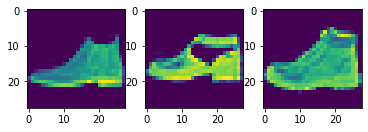

In [61]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1,3)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28

x_test_back = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])

axarr[0].imshow(x_test_back[FIRST_IMAGE])
axarr[0].grid(False)

axarr[1].imshow(x_test_back[SECOND_IMAGE])
axarr[1].grid(False)

axarr[2].imshow(x_test_back[THIRD_IMAGE])
axarr[2].grid(False)

In [62]:
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

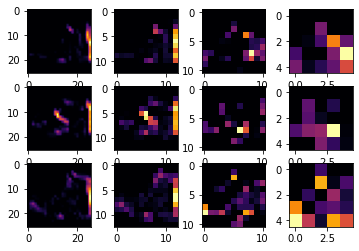

In [63]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

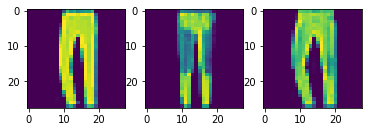

In [65]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1,3)
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5

x_test_back = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])

axarr[0].imshow(x_test_back[FIRST_IMAGE])
axarr[0].grid(False)

axarr[1].imshow(x_test_back[SECOND_IMAGE])
axarr[1].grid(False)

axarr[2].imshow(x_test_back[THIRD_IMAGE])
axarr[2].grid(False)

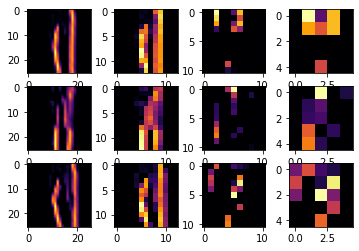

In [64]:
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)